## Setup

In [1]:
cd ../

/Users/rachelbittner/Dropbox/MARL/repos/motif


In [2]:
import motif
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Define File Paths

In [3]:
TRAIN_AUDIO = '/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/'
TRAIN_ANNOT = '/Users/rachelbittner/Documents/VocalAnnotations_MDB/annotations/'
TEST_AUDIO = '/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/'
TEST_ANNOT = '/Users/rachelbittner/Documents/VocalAnnotations_Tony/annotations/'

### Build file pairs

In [4]:
train_pairs = []
for audio_fpath in glob.glob(os.path.join(TRAIN_AUDIO, '*.wav')):
    annot_fpath = os.path.join(TRAIN_ANNOT, os.path.basename(audio_fpath).split('.')[0] + '.csv')
    train_pairs.append((audio_fpath, annot_fpath))

test_pairs = []
for audio_fpath in glob.glob(os.path.join(TEST_AUDIO, '*.wav')):
    annot_fpath = os.path.join(TEST_ANNOT, os.path.basename(audio_fpath).split('.')[0] + '.csv')
    test_pairs.append((audio_fpath, annot_fpath))


## Select component types

In [5]:
contour_extractor = motif.run.get_extract_module('salamon')
feature_extractor = motif.run.get_features_module('bitteli')
contour_classifier = motif.run.get_classify_module('random_forest')

## Build training set & fit classifier

In [6]:
print("Building training set...")
X_train, Y_train, train_contours = motif.run.process_with_labels(
    contour_extractor, feature_extractor, train_pairs
)
print("Fitting classifier...")
contour_classifier.fit(X_train, Y_train)

/usr/local/lib/python2.7/site-packages/mir_eval/melody.py:231: UserWarning: Non-uniform timescale passed to resample_melody_series.  Pitch will be linearly interpolated, which will result in undesirable behavior if silences are indicated by missing values.  Silences should be indicated by nonpositive frequency values.
  "Non-uniform timescale passed to resample_melody_series.  Pitch "
/usr/local/lib/python2.7/site-packages/mir_eval/melody.py:77: UserWarning: Reference melody has no voiced frames.
  warnings.warn("Reference melody has no voiced frames.")
/usr/local/lib/python2.7/site-packages/numpy/polynomial/polynomial.py:1407: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


Building training set...
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/AClassicEducation_NightOwl_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/AimeeNorwich_Child_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/AlexanderRoss_GoodbyeBolero_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/AlexanderRoss_VelvetCurtain_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/Auctioneer_OurFutureFaces_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/AvaLuna_Waterduct_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/BigTroubles_Phantom_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/BrandonWebster_DontHearAThing_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/BrandonWebster_YesSirICanFly_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotations_MDB/audio/CelestialShore_DieForUs_vocal.wav
/Users/rachelbittner/Documents/VocalAnnotation

### Get training set scores

In [8]:
Y_pred = contour_classifier.predict(X_train)
train_scores = contour_classifier.score(Y_pred, Y_train)
print train_scores
print contour_classifier.clf

{'f1': array([ 0.98875972,  0.9258247 ]), 'recall': array([ 0.97987858,  0.98472147]), 'support': array([52382,  7396]), 'mcc': 0.91680541515344827, 'precision': array([ 0.99780331,  0.87357563]), 'auc score': 0.99752237169229763, 'confusion matrix': array([[51328,  1054],
       [  113,  7283]]), 'accuracy': 0.98047776774064033}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=58, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Look at feature importances

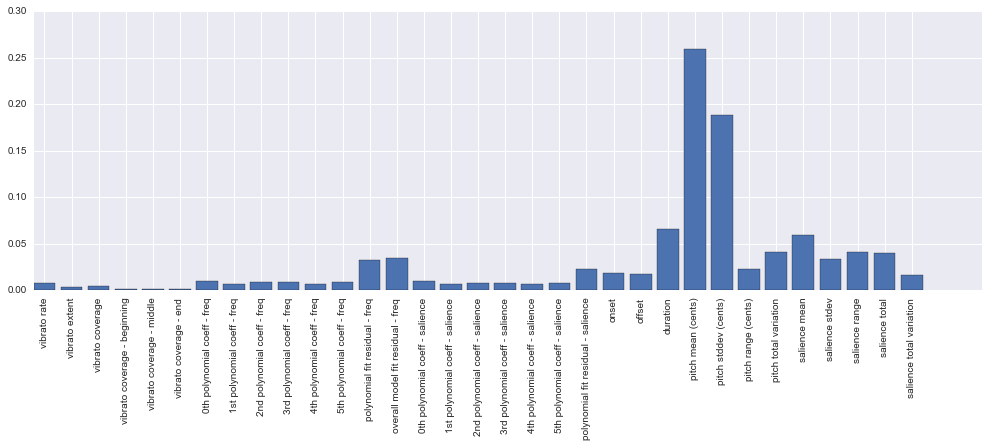

In [45]:
plt.figure(figsize=(17, 5))
x_vals = range(len(contour_classifier.clf.feature_importances_))
plt.bar(x_vals, contour_classifier.clf.feature_importances_)
plt.xticks([v + 0.4 for v in x_vals], feature_extractor.feature_names, rotation='vertical')
plt.savefig('feature_importances.pdf', ext='pdf', bbox_inches='tight')

## Build testing set

In [9]:
X_test, Y_test, test_contours = motif.run.process_with_labels(
    contour_extractor, feature_extractor, test_pairs
)

/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_FW04439_104.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_FW04439_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_SFW40430_107.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Brazil_FW04458_110.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW06929_201.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW06929_205.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW08771_108.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08880_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08882_102.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08882_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Cuba_SFW40461_103.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/India_ARCE00005_106.wav
/Users/ra

### Predict Labels & Get Testing Score

In [10]:
Y_pred = contour_classifier.predict(X_test)
test_scores = contour_classifier.score(Y_pred, Y_test)
print test_scores

{'f1': array([ 0.90304237,  0.57428215]), 'recall': array([ 0.88344924,  0.6362379 ]), 'support': array([3595,  723]), 'mcc': 0.48189235281992543, 'precision': array([ 0.92352428,  0.52332196]), 'auc score': 0.85879169816692547, 'confusion matrix': array([[3176,  419],
       [ 263,  460]]), 'accuracy': 0.84205650764242701}


## Predict on new set

In [50]:
WORLDMUSIC_DIR = '/Users/rachelbittner/Documents/WorldMusicSet'
prediction_set = glob.glob(os.path.join(WORLDMUSIC_DIR, 'audio', '*.wav'))
contour_output_dir = os.path.join(WORLDMUSIC_DIR, 'contours')

In [51]:
for audio_filepath in prediction_set:
    save_name = os.path.basename(audio_filepath).split('.')[0]
    save_path = os.path.join(contour_output_dir, "{}.csv".format(save_name))
    print(save_name)
    if not os.path.exists(save_path):
        ctr = contour_extractor.compute_contours(audio_filepath)

        X = feature_extractor.compute_all(ctr)
        Y = contour_classifier.predict(X)

        save_nums = [n for n in ctr.nums if Y[n] >= contour_classifier.threshold]
        ctr.save_contours_subset(save_path, save_nums)
        print("    --> done!")
    else:
        print("    --> already done!")

Argentina_FW04175_311
    --> already done!
Argentina_FW04176_101
    --> already done!
Argentina_FW04176_102
    --> already done!
Argentina_FW04176_104
    --> already done!
Argentina_FW04176_201
    --> already done!
Argentina_FW04176_202
    --> already done!
Argentina_FW04176_206
    --> already done!
Argentina_FW04176_306
    --> already done!
Argentina_FW04176_401
    --> already done!
Argentina_FW04176_403
    --> already done!
Argentina_FW04176_404
    --> already done!
Argentina_FW04179_106
    --> already done!
Argentina_FW04179_110
    --> already done!
Argentina_FW04179_111
    --> already done!
Argentina_FW04179_112
    --> already done!
Argentina_FW04179_113
    --> already done!
Argentina_FW04179_115
    --> already done!
Argentina_FW04179_117
    --> already done!
Argentina_FW04179_119
    --> already done!
Argentina_FW04179_122
    --> already done!
Argentina_FW04179_124
    --> already done!
Argentina_FW04179_125
    --> already done!
Argentina_FW04179_129
    --> al

# Tinkering with coverage of different contour_extractors

In [81]:
contour_extractor = motif.run.get_extract_module('salamon')
salamon_recall = {}
for audio_filepath, annotation in test_pairs:
    print audio_filepath
    ctr = contour_extractor.compute_contours(audio_filepath)
    coverage_score = ctr.coverage(annotation)
    salamon_recall[audio_filepath] = coverage_score['Recall']
    Y_train, _ = ctr.compute_labels(annotation)
    X_train = feature_extractor.compute_all(ctr)
print salamon_recall

/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_FW04439_104.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_FW04439_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Australia_SFW40430_107.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Brazil_FW04458_110.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW06929_201.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW06929_205.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Canada_FW08771_108.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08880_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08882_102.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/China_FW08882_105.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/Cuba_SFW40461_103.wav
/Users/rachelbittner/Documents/VocalAnnotations_Tony/audio/India_ARCE00005_106.wav
/Users/ra

/usr/local/lib/python2.7/site-packages/mir_eval/multipitch.py:410: UserWarning: Estimate times not equal to reference times. Resampling to common time base.
  warnings.warn("Estimate times not equal to reference times. "


In [ ]:
contour_extractor = motif.run.get_extract_module('hll')
hll_recall = {}
for audio_filepath, annotation in test_pairs:
    print audio_filepath
    ctr = contour_extractor.compute_contours(audio_filepath)
    ctr.plot()
    ctr.plot_with_annotation(annotation)
    coverage_score = ctr.coverage(annotation)
    hll_recall[audio_filepath] = coverage_score['Recall']
#     print coverage_score['Chroma Recall']
print hll_recall

In [82]:
print(np.mean(salamon_recall.values()))
print(np.std(salamon_recall.values()))
# print ""
# print(np.mean(hll_recall.values()))
# print(np.std(hll_recall.values()))

0.713000447237
0.244191187894


# Get vocal contour statistics

In [75]:
contour_extractor = motif.run.get_extract_module('hll')
n_contours = []
# min_duration = []
# max_duration = []
# avg_duration = []
max_idx = []
for audio_filepath in prediction_set:
    save_name = os.path.basename(audio_filepath).split('.')[0]
    print(save_name)
    save_path = os.path.join(contour_output_dir, "{}.csv".format(save_name))
    i, t, f, s = contour_extractor._load_contours(save_path)
    if len(i) == 0:
        continue
    cnums = list(set(i))
    n_contours.append(len(cnums))
    max_idx.append(np.max(cnums))
#     c_durations = []
#     for n in cnums:
#         idx = np.where(i == n)[0]
#         c_durations.append(np.max(t[idx]) - np.min(t[idx]))
#     min_duration.append(np.min(c_durations))
#     max_duration.append(np.max(c_durations))
#     avg_duration.append(np.mean(c_durations))
    

Argentina_FW04175_311
Argentina_FW04176_101
Argentina_FW04176_102
Argentina_FW04176_104
Argentina_FW04176_201
Argentina_FW04176_202
Argentina_FW04176_206
Argentina_FW04176_306
Argentina_FW04176_401
Argentina_FW04176_403
Argentina_FW04176_404
Argentina_FW04179_106
Argentina_FW04179_110
Argentina_FW04179_111
Argentina_FW04179_112
Argentina_FW04179_113
Argentina_FW04179_115
Argentina_FW04179_117
Argentina_FW04179_119
Argentina_FW04179_122
Argentina_FW04179_124
Argentina_FW04179_125
Argentina_FW04179_129
Argentina_FW04179_130
Argentina_FW04179_132
Argentina_FW04179_135
Argentina_FW04179_136
Argentina_FW04179_137
Argentina_FW04179_138
Argentina_FW04179_140
Argentina_FW04542_407
Argentina_MON00809_102
Argentina_MON00809_104
Argentina_MON00809_105
Argentina_MON00809_205
Argentina_PAR01016_101
Argentina_PAR01016_102
Argentina_PAR01016_104
Argentina_PAR01016_105
Argentina_PAR01016_107
Argentina_PAR01016_203
Argentina_PAR01016_206
Argentina_SFW40470_102
Argentina_SFW40532_101
Argentina_SFW40532_

In [56]:
np.mean(n_contours)

26.086281588447655

In [60]:
np.std(n_contours)

13.739589149611801

In [61]:
np.max(n_contours)

85

In [67]:
min_duration = np.array(min_duration) * 44100.0
max_duration = np.array(max_duration) * 44100.0
avg_duration = np.array(avg_duration) * 44100.0

In [73]:
np.min(min_duration)

0.098599999999995608

In [74]:
np.max(max_duration)

11.818910000000001

In [70]:
np.mean(avg_duration)

0.57919345217133755

In [79]:
np.max(max_idx)

458

In [ ]:
test_list = None

In [2]:
import numpy as np
np.mean([ 0.98875972,  0.9258247 ])

0.95729220999999998